In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Basic NumPy Arrays

In [3]:
stock_list = [3.5, 5, 2, 8, 4.2]

In [4]:
returns = np.array(stock_list)
print(returns), type(returns)

[3.5 5.  2.  8.  4.2]


(None, numpy.ndarray)

ndarray because NumPy let's you create a multi dimensional array in case you, for example, pass to np.array a list of list.

In [5]:
A = np.array([[1, 2], [3, 4]])
print(A), type(A)

[[1 2]
 [3 4]]


(None, numpy.ndarray)

In [6]:
print(A.shape)

(2, 2)


In [7]:
print(returns[0], returns[len(returns) - 1])

3.5 4.2


In [8]:
print(returns[1:3])

[5. 2.]


In [9]:
print(A[:, 0])

[1 3]


In [10]:
print(A[0, :])

[1 2]


In [11]:
print(type(A[0, :]))

<class 'numpy.ndarray'>


In [12]:
print(A[0])

[1 2]


In [13]:
print(A[1, 1])

4


### Array functions

In [14]:
np.log(returns)

array([1.25276297, 1.60943791, 0.69314718, 2.07944154, 1.43508453])

In [15]:
print(np.mean(returns))

4.54


In [16]:
print(max(returns))

8.0


In [17]:
# Return to the returns
returns * 2 + 5

array([12. , 15. ,  9. , 21. , 13.4])

In [18]:
print("Mean:", np.mean(returns), "Std Dev:", np.std(returns))

Mean: 4.54 Std Dev: 1.9915822855207364


In [19]:
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

In [20]:
# The random module is very useful. It contains methods for sampling from many different probability distributions. 
# In this case we draw N = 100 random samples from a normal distribution with mean 1.01 and standard deviation 0.03. 
# We treat these as the daily percentage returns of our assets and take the cumulative product to get the current price.
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

In [24]:
# Generate assets that are correlated with R_1
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)

mean_returns = [(np.mean(R) - 1) * 100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

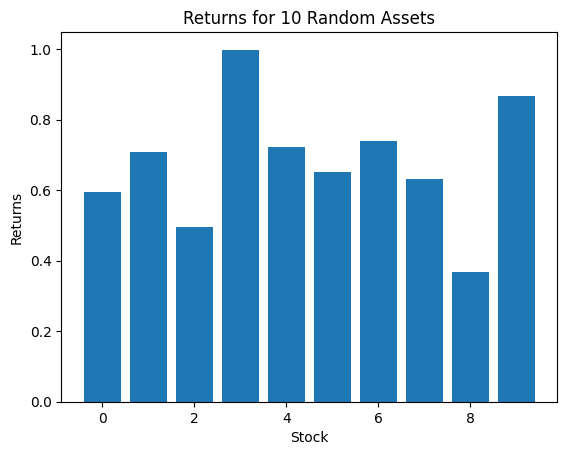

In [22]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

### Calculating Excepted Return 

In [32]:
# Generate N random weights for each asset in the portfolio
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)

In [33]:
# To calculate the mean return of the portfolio, we have to scale each asset's return by its designated weight.
p_returns = np.dot(mean_returns, weights)
print("Expected return of the portfolio:", p_returns)


Expected return of the portfolio: 0.7602357634382253


Beware of NaN values

In [35]:
v = np.array([1, 2, np.nan, 4, 5])
print(v)

[ 1.  2. nan  4.  5.]


In [36]:
# What happens when we try to take the mean of this array?
print(np.mean(v))

nan


In [37]:
# We can check for nan values with the isnan() function.
np.isnan(v)

array([False, False,  True, False, False])

In [40]:
# NumPy arrays can be indexed by boolean values (True or False). If we use a boolean array to index an array, 
# we will remove all values of the array that register as False under the condition. We use the isnan() function in create a boolean array, 
# assigning a True value to everything that is not nan and a False to the nans and we use that to index the same array.
ix = ~np.isnan(v) # ~ indicates a logical not, inverting bools
print(v[ix])

# alternative v[~np.isnan(v)]

[1. 2. 4. 5.]


In [41]:
print(np.mean(v[ix]))

3.0


In [42]:
print(np.nanmean(v))

3.0


### Linear Algebra for Financial Calculation

We can express the matrix equation as: $y = A\cdot x$
Where A is an m x n matrix, y is a m x 1 vector, and x is a n x 1 vector. On the right-hand side of the equation we are multiplying a matrix by a vector.


#### Matrix multiplication

In [44]:
A = np.array([
    [1, 2, 3, 12, 6],
    [4, 5, 6, 15, 20],
    [7, 8, 9, 10, 10]
])
B = np.array([
    [4, 4, 2],
    [2, 3, 1],
    [6, 5, 8],
    [9, 9, 9]
])

In [46]:
print(np.dot(A, B))

ValueError: shapes (3,5) and (4,3) not aligned: 5 (dim 1) != 4 (dim 0)

In [47]:
print(np.dot(B, A))

[[ 34  44  54 128 124]
 [ 21  27  33  79  82]
 [ 82 101 120 227 216]
 [108 135 162 333 324]]


### Portfolio Variance